### Part 1

***Problem Statement*** - The goal of the project is to build a RAG system using frameworks such as LlamaIndex or LangChain.


### RAG - System Architecture

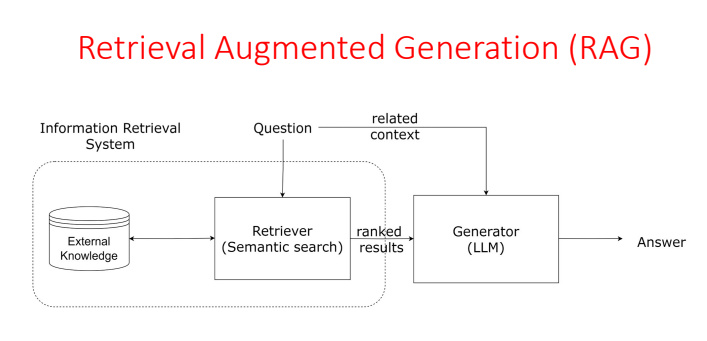

### Part 2 - Solution POC

The basic RAG pipeline in LlamaIndex is illustrated below.

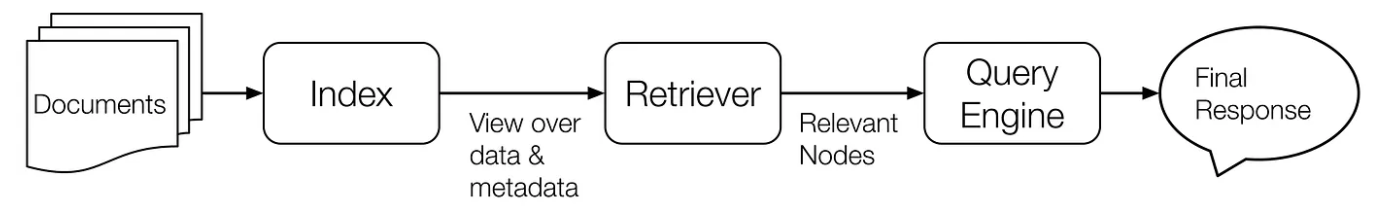

This starter notebook contains the general steps to create an RAG using LlamaIndex framework. Feel free to modify the code as per your requirement.

# **Fashion Search AI Project Overview**

**Objective**: Develop an AI-powered fashion search engine that leverages generative search capabilities to analyze product descriptions from the Myntra dataset (available on Kaggle). This system will intelligently understand user queries and recommend relevant fashion items based on their preferences and search terms.

**Project Scope:**

This project involves the development of a comprehensive fashion search system with a strong emphasis on experimentation and optimization across three distinct layers:

**1. Embedding Layer:**

Thorough preprocessing and cleaning of the Myntra dataset to ensure data quality.
Effective embedding of product descriptions to facilitate accurate and efficient search.

**2. Search Layer:**

Creation of at least three test queries to evaluate system performance.
Embedding of user queries and subsequent search within the vector database.
Implementation of a cache mechanism to enhance search speed and responsiveness.
Development of a re-ranking block leveraging cross-encoding models from HuggingFace to refine search results.

**3. Generation Layer:**

Design of a final prompt that effectively captures user intent and produces relevant product recommendations.
By systematically addressing each layer and iteratively experimenting with different approaches, the project aims to create a high-performing fashion search system that caters to user preferences and delivers a seamless search experience. The ultimate goal is to create a search engine that not only understands user queries but also anticipates their needs, leading to improved user satisfaction and increased engagement with the platform.

**Step 1** : Import the necessary libraries

In [1]:
# Install OpenAI, LlamaIndex, chromadb
!pip install -U -qq llama-index openai chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.1/324.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.8/526.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
# Importing the libraries
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage
import os
import openai
import pandas as pd
from sentence_transformers import CrossEncoder, util

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


**Step 2**: Mount your Google Drive and Set the API key

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [5]:
# Set the API key
from google.colab import userdata

openai.api_key = userdata.get('OPENAI_API_Key')

Step 3 - Data Loading

Dataset:

- For HelpMate AI project, the Myntra Fashion Product Dataset can be downloaded from the module 'RAG Demonstration' or download the files from the following [link](https://www.kaggle.com/datasets/djagatiya/myntra-fashion-product-dataset/data)



In [6]:
# Define the file path to the Fashion Dataset CSV file
file_path = '/content/drive/My Drive/HelpMate/Fashion Dataset v2.csv'

# Read the Fashion Dataset CSV file into a Pandas DataFrame

myntra_data = pd.read_csv(file_path)
# Display the first few rows of the DataFrame to verify the data has been loaded correctly
myntra_data.head()

p_id                                               name  \
5062   18688460        max Women Blue Printed A-Line Flared Skirts   
11931  17441634  ZALORA BASICS Women Blue Windcheater Denim Jacket   
13939  14179076  DressBerry Women Navy Blue & White Self-Design...   
9932   17681972  SHUBHKALA Blue Embellished Mirror Work Semi-St...   
9345   16017408  Readiprint Fashions Beige Embroidered Unstitch...   

                       products    price     colour                brand  \
5062                     Skirts    999.0       Blue                  max   
11931                    Jacket   3099.0       Blue        ZALORA BASICS   
13939                    Poncho   2099.0  Navy Blue           DressBerry   
9932   Lehenga, Blouse, Dupatta  12000.0       Blue            SHUBHKALA   
9345             Dress Material   5100.0      Beige  Readiprint Fashions   

                                                     img  ratingCount  \
5062   http://assets.myntassets.com/assets/images/186...          NaN   
11931  http://assets.myntassets.com/assets/images/174...          NaN   
13939  http://assets.myntassets.com/assets/images/141...         63.0   
9932   http://assets.myntassets.com/assets/images/176...          NaN   
9345   http://assets.myntassets.com/assets/images/160...          NaN   

       avg_rating                                        description  \
5062          NaN  <p>Blue printed A-line flared skirt, has an el...   
11931         NaN  Blue solid windcheater denim jacket,  has a sp...   
13939    4.492063  Navy blue self design poncho with fringed deta...   
9932          NaN  Blue embellished lehenga choli with dupatta, m...   
9345          NaN  Beige embroidered unstitched dress material <b...   

                                            p_attributes  
5062   {'Add-Ons': 'NA', 'Body Shape ID': '324,333,42...  
11931  {'Add-Ons': 'NA', 'Body Shape ID': '443,333,42...  
13939  {'Body Shape ID': '443,333,324,424', 'Body or ...  
9932   {'Blouse Closure': 'NA', 'Blouse Fabric': 'Pol...  
9345   {'Bottom Fabric': 'Net', 'Bottom Pattern': 'Em...

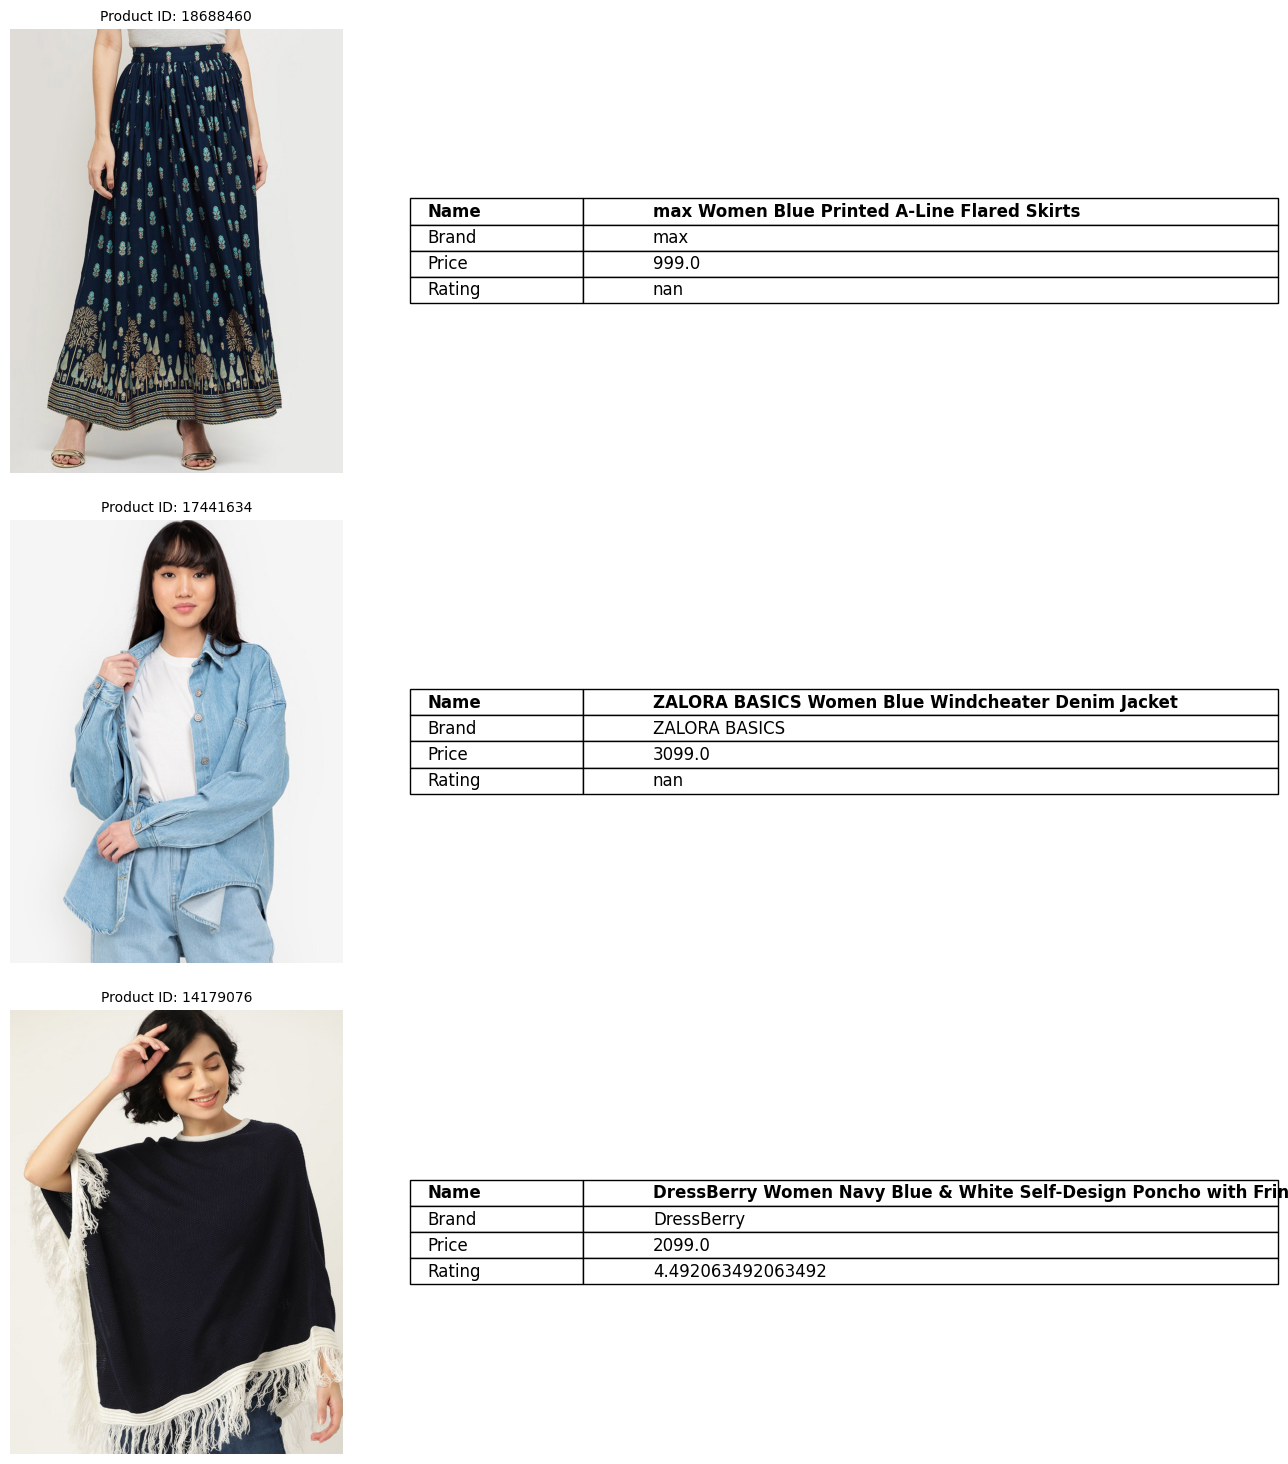

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
import io

def display_images_with_info(df, num_images=3):
    """Displays images from URLs with accompanying product information tables."""

    fig, axes = plt.subplots(num_images, 2, figsize=(15, num_images * 5))

    for i, (idx, row) in enumerate(df.head(num_images).iterrows()):
        image_url = row['img']

        try:
            response = requests.get(image_url)
            response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)
            img = Image.open(io.BytesIO(response.content))
        except (requests.exceptions.RequestException, Image.UnidentifiedImageError):
            print(f"Warning: Image failed to load from URL: {image_url}")
            continue

        axes[i, 0].imshow(img)
        axes[i, 0].axis('off')
        axes[i, 0].set_title(f"Product ID: {row['p_id']}", fontsize=10)  # Add title for clarity

        table_data = [
            ["Name", row['name']],
            ["Brand", row['brand']],
            ["Price", row['price']],
            ["Rating", row['avg_rating']]
        ]

        table = axes[i, 1].table(
            cellText=table_data,
            loc='center',
            cellLoc='left',
            colWidths=[0.2, 0.8]
        )
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        table.scale(1.2, 1.2)

        for (row, col), cell in table.get_celld().items():
            if row == 0:
                cell.set_text_props(weight='bold')

        axes[i, 1].axis('off')

    plt.tight_layout(pad=2.0)  # Increase padding for better spacing
    plt.show()

# Assuming 'myntra_data' is your DataFrame with 'img' column containing image URLs
display_images_with_info(myntra_data)


**Dataset Chunking Decision:**

For this project, we have decided not to divide the dataset into smaller chunks. This decision is primarily due to the manageable size of our dataset and its inherent structure, where each data point is already organized within rows and columns. Chunking, a technique often employed for processing large datasets in smaller segments, is not currently necessary given the scope of our data and the available time for analysis.

While chunking could potentially offer advantages in terms of handling massive volumes of data more efficiently, it is not deemed essential for our current analysis due to the dataset's size and existing structure. If the dataset were to significantly expand or if our analysis needs were to change, we may revisit chunking as a means to streamline our data processing pipeline.

For the time being, we will proceed with processing the entire dataset as is, utilizing its organized format to extract meaningful insights and conduct comprehensive analyses.

**Embedding Layer: Generate and Store Embeddings**

In this stage, we will employ OpenAI's text-embedding-ada-002 model to create numerical representations (embeddings) of the product descriptions in our dataframe. These embeddings will then be stored in a ChromaDB collection for efficient search and retrieval.

In [9]:
# Prepare data for embedding (add metadata)
def prepare_metadata(row):
    """Creates a metadata dictionary from a DataFrame row."""
    return {
        'Product_id': row['p_id'],
        'Name': row['name'],
        'Product_type': row['products'],
        'Price_INR': row['price'],
        'Colour': row['colour'],
        'Brand': row['brand'],
        'RatingCount': row['ratingCount'],
        'Rating': row['avg_rating'],
        'Description': row['description'],
        'Product_attributes': row['p_attributes'],
        'Product_img_url': row['img']
    }

myntra_data['metadata'] = myntra_data.apply(prepare_metadata, axis=1)

In [10]:
# Extract text content for embedding
def extract_text(metadata):
    """Combines relevant fields from metadata into a single text string."""
    description = metadata.get('Description', "")  # Handle missing descriptions
    name = metadata.get('name', "")
    return (description + " " + name).strip() or "No description available"

documents = [extract_text(row['metadata']) for _, row in myntra_data.iterrows()]


In [11]:
import chromadb
import pandas as pd
import openai
from chromadb.utils import embedding_functions

import os

# Initialize ChromaDB with persistent storage
persist_directory = '/content/drive/My Drive/HelpMate/ChromaDB_Data'
client = chromadb.PersistentClient(path=persist_directory)

# Set up OpenAI embedding model
embedding_model = "text-embedding-ada-002"
embedding_function = embedding_functions.OpenAIEmbeddingFunction(api_key=openai.api_key, model_name=embedding_model)

# Get or create ChromaDB collection
collection_name = 'Fashion_Products'
collection = client.get_or_create_collection(
    name=collection_name,
    embedding_function=embedding_function
)

# Add data to the collection (with progress indicator)
for idx, (p_id, metadata) in enumerate(zip(myntra_data['p_id'], myntra_data['metadata'])):
    if idx % 100 == 0:  # Print every 100 documents for progress
        print(f"Processing document {idx+1}/{len(myntra_data)}")

    collection.add(
        documents=[documents[idx]],
        ids=[str(p_id)],
        metadatas=[metadata]
    )

print("Data added to ChromaDB collection!")


Processing document 1/2843
Processing document 101/2843
Processing document 201/2843
Processing document 301/2843
Processing document 401/2843
Processing document 501/2843
Processing document 601/2843
Processing document 701/2843
Processing document 801/2843
Processing document 901/2843
Processing document 1001/2843
Processing document 1101/2843
Processing document 1201/2843
Processing document 1301/2843
Processing document 1401/2843
Processing document 1501/2843
Processing document 1601/2843
Processing document 1701/2843
Processing document 1801/2843
Processing document 1901/2843
Processing document 2001/2843
Processing document 2101/2843
Processing document 2201/2843
Processing document 2301/2843
Processing document 2401/2843
Processing document 2501/2843
Processing document 2601/2843
Processing document 2701/2843
Processing document 2801/2843
Data added to ChromaDB collection!


In [12]:
cache_collection = client.get_or_create_collection(name='Fashion_Products_Cache', embedding_function=embedding_function)

In [13]:
cache_collection

Collection(name=Fashion_Products_Cache)

In [14]:
cache_collection.peek()

{'ids': [],
 'embeddings': [],
 'metadatas': [],
 'documents': [],
 'uris': None,
 'data': None}

In [15]:
collection.peek(5)

{'ids': ['10054519', '10074617', '10075453', '1010438', '10133095'],
 'embeddings': [[-0.030850475654006004,
   -0.03522718697786331,
   -0.009153731167316437,
   -0.03341245278716087,
   -0.010287939570844173,
   0.0013210194883868098,
   -0.006551722995936871,
   -0.01152222603559494,
   -0.006585082039237022,
   -0.04390054941177368,
   0.023684946820139885,
   0.013303600251674652,
   -0.000557930616196245,
   -0.01445115264505148,
   -6.478958675870672e-05,
   0.031571030616760254,
   0.014317716471850872,
   0.00012394982331898063,
   0.0029639541171491146,
   -0.029782986268401146,
   -0.008960248902440071,
   0.0238050390034914,
   0.0009323862614110112,
   0.010207878425717354,
   -0.00778600899502635,
   -0.004967167042195797,
   0.023351354524493217,
   -0.012990024872124195,
   0.002608679933473468,
   -0.008686704561114311,
   0.010488094761967659,
   -0.01014783140271902,
   0.0038229504134505987,
   -0.03199802711606026,
   -0.021296435967087746,
   0.013156821019947529,

**Semantic Search with Cache**

In this stage, we will conduct a semantic search using a given query within the collection of embedded product descriptions. This search will retrieve the top results that are semantically most similar to the query, ensuring that the retrieved products are contextually relevant to the user's search intent. To optimize search speed and efficiency, we will also implement a cache mechanism to store and reuse previous search results.

In [16]:
query = input("Please enter your fashion-related query. For example, you can mention the color, size, price range, style, and any specific patterns or designs you prefer: ")


Please enter your fashion-related query. For example, you can mention the color, size, price range, style, and any specific patterns or designs you prefer: I am looking for a festive ethnic set from Ishin, specifically for adults. The ideal set would feature a navy blue top with golden foil print, round neck, and three-quarter sleeves. It should come with a matching skirt that has a drawstring closure. Both the top and skirt should be made from 100% cotton.


In [17]:
# Searh the Cache collection first
# Query the collection against the user query and return the top 20 results

cache_results = cache_collection.query(
    query_texts=query,
    n_results=1
)

In [18]:
cache_results


{'ids': [[]],
 'distances': [[]],
 'metadatas': [[]],
 'embeddings': None,
 'documents': [[]],
 'uris': None,
 'data': None}

**Search Layer**

In [19]:
results = collection.query(
    query_texts=query,  # User query provided as input
    n_results=5  # Number of results to retrieve, in this case, the top 3 most relevant results
)

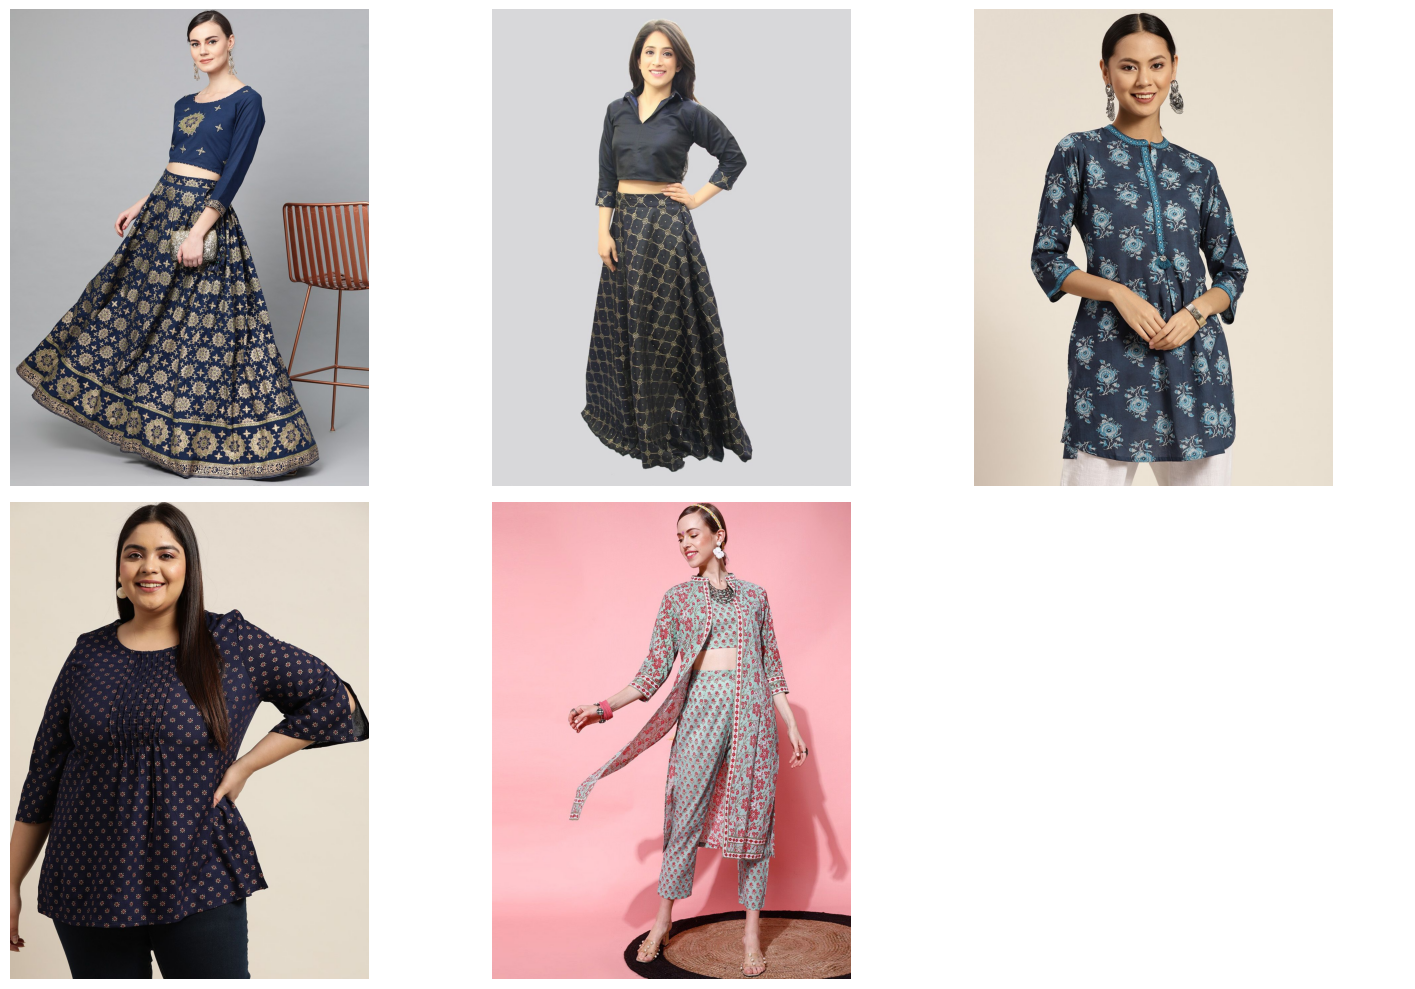

-------------------------------------------------------



In [20]:
import requests
from io import BytesIO
from PIL import Image


def display_results(results, images_folder_path=None):
   # Extract Product Image URLs from nested structure
    img_urls = []
    for product_metadata in results['metadatas'][0]:  # Assuming one list within 'metadatas'
        img_urls.append(product_metadata['Product_img_url'])
    # Calculate layout for efficient display
    num_images = len(img_urls) #5
    num_cols = 3
    num_rows = (num_images + num_cols - 1) // num_cols

    # Create the plot
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))
    axes = axes.flatten()

    # Iterate over the results
    for i, img_url in enumerate(img_urls):
        try:
            response = requests.get(img_url)
            response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)
            img = Image.open(BytesIO(response.content))
            axes[i].imshow(img)
            axes[i].axis('off')
        except requests.exceptions.RequestException as e:
            axes[i].axis('off')
            axes[i].text(0.5, 0.5, f"Error loading image: {e}", fontsize=12, ha='center', va='center')

    # Hide any remaining empty subplots
    for j in range(num_images, num_rows * num_cols):
        axes[j].axis('off')

    # Finalize and display
    plt.tight_layout()
    plt.show()

    # Print text results for further inspection
    print("-------------------------------------------------------\n")
    results.items()

# Assuming you have the results in the variable 'results'
display_results(results)


In [21]:
print(results.items())

dict_items([('ids', [['11253928', '18345376', '18882466', '16276470', '18497968']]), ('distances', [[0.2374695986509323, 0.27699029445648193, 0.29721173644065857, 0.30011266469955444, 0.30089104175567627]]), ('metadatas', [[{'Brand': 'Ishin', 'Colour': 'Navy Blue', 'Description': 'This clothing set consists of top and skirt<br>Navy Blue and golden foil printed top, has a round neck, three-quarter sleeves<br>Navy Blue and golden foil printed skirt, has a drawstring closureThe model (height 5\'8") is wearing a size STop fabric: Pure Cotton<br>Bottom fabric: Pure Cotton<br>Dry-clean', 'Name': 'Ishin Women Navy Blue & Golden Foil Printed Top with Skirt', 'Price_INR': 4499.0, 'Product_attributes': "{'Add-Ons': 'NA', 'Bottom Closure': 'Drawstring', 'Bottom Fabric': 'Pure Cotton', 'Bottom Pattern': 'Printed', 'Bottom Type': 'Skirt', 'Character': 'NA', 'Lining': 'NA', 'Neck': 'Round Neck', 'Number of Pockets': 'NA', 'Occasion': 'Ethnic', 'Sleeve Length': 'Three-Quarter Sleeves', 'Sustainable':

In [22]:
# Implementing Cache in Semantic Search

# Set a threshold for cache search
threshold = 0.2

ids = []
documents = []
distances = []
metadatas = []
results_df = pd.DataFrame()

# If the distance is greater than the threshold, then return the results from the main collection.

if cache_results['distances'][0] == [] or cache_results['distances'][0][0] > threshold:
      # Query the collection against the user query and return the top 10 results
      results = collection.query(
      query_texts=query,
      n_results=10
      )

      # Store the query in cache_collection as document w.r.t to ChromaDB so that it can be embedded and searched against later
      # Store retrieved text, ids, distances and metadatas in cache_collection as metadatas, so that they can be fetched easily if a query indeed matches to a query in cache
      Keys = []
      Values = []

      for key, val in results.items():
        if val is None:  # Skip entries where the value is None
          continue

    # Iterate over the elements in the first nested list (val[0])
        for i in range(len(val[0])):  # Iterate over the actual length of val
          Keys.append(str(key) + str(i))
          if len(val[0]) > i:  # Check if the current index exists in val
            Values.append(str(val[0][i]))


      cache_collection.add(
          documents= [query],
          ids = [query],  # Or if you want to assign integers as IDs 0,1,2,.., then you can use "len(cache_results['documents'])" as will return the no. of queries currently in the cache and assign the next digit to the new query."
          metadatas = dict(zip(Keys, Values))
      )

      print("Not found in cache. Found in main collection.")

      result_dict = {'Metadatas': results['metadatas'][0], 'Documents': results['documents'][0], 'Distances': results['distances'][0], "IDs":results["ids"][0]}
      results_df = pd.DataFrame.from_dict(result_dict)
      results_df


# If the distance is, however, less than the threshold, you can return the results from cache

elif cache_results['distances'][0][0] <= threshold  and cache_results['ids']:
      cache_result_dict = cache_results['metadatas'][0][0]
      # Loop through each inner list and then through the dictionary
      for key, value in cache_result_dict.items():
          if key.startswith("ids"):  # More robust check for keys starting with "ids"
              ids.append(value)
          elif key.startswith("documents"):
              documents.append(value)
          elif key.startswith("distances"):
              distances.append(value)
          elif key.startswith("metadatas"):
              metadatas.append(value)

      print("Found in cache!")

      # Create a DataFrame
      results_df = pd.DataFrame({
        'IDs': ids,
        'Documents': documents,
        'Distances': distances,
        'Metadatas': metadatas
      })
else:
    # Print message indicating no valid results found in cache
    print("No valid results found in cache!")

Not found in cache. Found in main collection.


In [23]:
cache_collection

Collection(name=Fashion_Products_Cache)

In [24]:
results_df

Metadatas  \
0  {'Brand': 'Ishin', 'Colour': 'Navy Blue', 'Des...   
1  {'Brand': 'CRAZEVILLA', 'Colour': 'Navy Blue',...   
2  {'Brand': 'Rain & Rainbow', 'Colour': 'Navy Bl...   
3  {'Brand': 'Sztori', 'Colour': 'Navy Blue', 'De...   
4  {'Brand': 'STREET 9', 'Colour': 'Blue', 'Descr...   
5  {'Brand': 'Meeranshi', 'Colour': 'Orange', 'De...   
6  {'Brand': 'W', 'Colour': 'Off White', 'Descrip...   
7  {'Brand': 'Inddus', 'Colour': 'Black', 'Descri...   
8  {'Brand': 'Varanga', 'Colour': 'Navy Blue', 'D...   
9  {'Brand': 'Global Desi', 'Colour': 'Green', 'D...   

                                           Documents  Distances       IDs  
0  This clothing set consists of top and skirt<br...   0.237470  11253928  
1  This clothing set consists of Top and Skirt<br...   0.276990  18345376  
2  <ul><li>Navy blue a-line kurti</li><li>Ethnic ...   0.297212  18882466  
3  <ul><li>Navy&nbsp;and golden&nbsp;a-line kurti...   0.300113  16276470  
4  <p>This clothing set consists of top, trouser ...   0.300891  18497968  
5  This clothing set consists of top, trousers an...   0.304071  10642980  
6  This clothing set consists of top and trousers...   0.304690  11596414  
7  This clothing set consists of top and skirt<br...   0.304973  13728148  
8  <ul> <li> Colour: navy blue and red </li> <li>...   0.306191  17408530  
9  <ul><li>Green and pink regular A-line top</li>...   0.306687  14960422

Query: 
I am looking for a festive ethnic set from Ishin, specifically for adults.
The ideal set would feature a navy blue top with golden foil print, round neck, and three-quarter sleeves.
It should come with a matching skirt that has a drawstring closure.
Both the top and skirt should be made from 100% cotton.


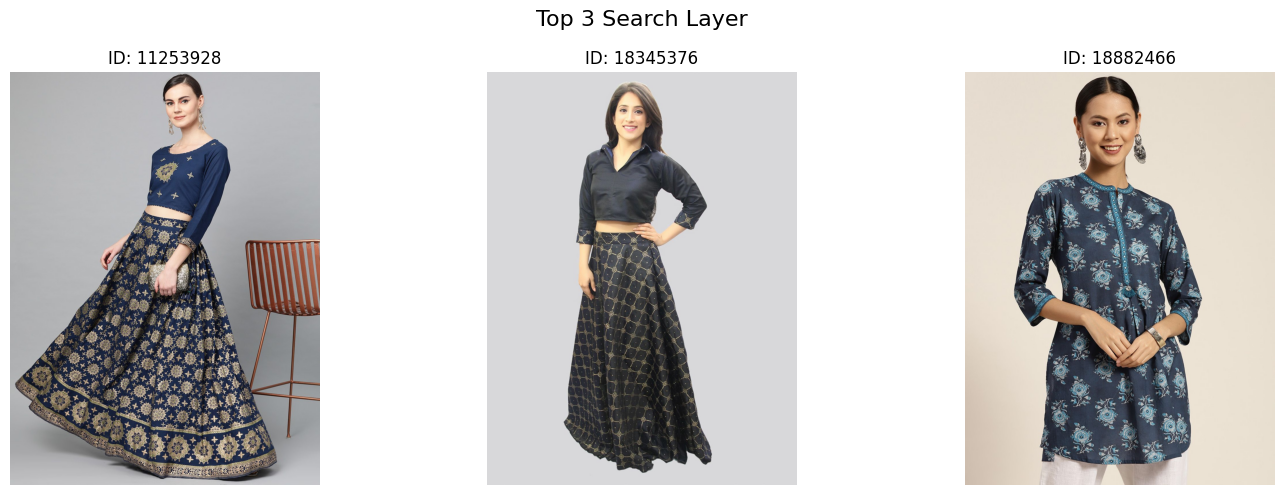

Metadatas  \
0  {'Brand': 'Ishin', 'Colour': 'Navy Blue', 'Des...   
1  {'Brand': 'CRAZEVILLA', 'Colour': 'Navy Blue',...   
2  {'Brand': 'Rain & Rainbow', 'Colour': 'Navy Bl...   
3  {'Brand': 'Sztori', 'Colour': 'Navy Blue', 'De...   
4  {'Brand': 'STREET 9', 'Colour': 'Blue', 'Descr...   
5  {'Brand': 'Meeranshi', 'Colour': 'Orange', 'De...   
6  {'Brand': 'W', 'Colour': 'Off White', 'Descrip...   
7  {'Brand': 'Inddus', 'Colour': 'Black', 'Descri...   
8  {'Brand': 'Varanga', 'Colour': 'Navy Blue', 'D...   
9  {'Brand': 'Global Desi', 'Colour': 'Green', 'D...   

                                           Documents  Distances       IDs  
0  This clothing set consists of top and skirt<br...   0.237470  11253928  
1  This clothing set consists of Top and Skirt<br...   0.276990  18345376  
2  <ul><li>Navy blue a-line kurti</li><li>Ethnic ...   0.297212  18882466  
3  <ul><li>Navy&nbsp;and golden&nbsp;a-line kurti...   0.300113  16276470  
4  <p>This clothing set consists of top, trouser ...   0.300891  18497968  
5  This clothing set consists of top, trousers an...   0.304071  10642980  
6  This clothing set consists of top and trousers...   0.304690  11596414  
7  This clothing set consists of top and skirt<br...   0.304973  13728148  
8  <ul> <li> Colour: navy blue and red </li> <li>...   0.306191  17408530  
9  <ul><li>Green and pink regular A-line top</li>...   0.306687  14960422

In [25]:

import requests
from io import BytesIO
from PIL import Image

def print_query_with_separator(prefix, query):
    # Print the prefix
    print(prefix)
    # Insert a newline character after every full stop
    query_with_newlines = query.replace(". ", ".\n")
    # Print the modified query
    print(query_with_newlines)

def display_results(results_df, top_n=3):
    # Extract Image URLs from 'Metadatas' column
    img_urls = []
    for metadata_json in results_df['Metadatas'][:top_n]:

      if isinstance(metadata_json, str):
        if "Product_img_url" in metadata_json:
          # Find the start and end indices of the value
          start_index = metadata_json.find("'Product_img_url': '") + len("'Product_img_url': '")
          end_index = metadata_json.find("'", start_index)

          # Extract the image URL
          image_url = metadata_json[start_index:end_index]
          img_urls.append(image_url)
      else:
          img_urls.append(metadata_json['Product_img_url'])

    # Calculate layout for efficient display
    num_images = len(img_urls)
    #fig, axess = plt.subplots(1, num_images, figsize=(15, 5))
    fig, axes = plt.subplots(1, len(img_urls), figsize=(15, 5))
    # Handle single image case (avoiding a one-element array)
    if len(img_urls) == 1:
        axes = [axes]

    # fig.suptitle(fig_title, fontsize=16)

    # axess = axess.flatten()
    # Set the title of the plot as the user query
    fig.suptitle("Top 3 Search Layer", fontsize=16)

    for i, img_url in enumerate(img_urls):
        try:
            response = requests.get(img_url, timeout=5)  # Add timeout for better handling
            response.raise_for_status()  # Check for HTTP errors (e.g., 404)

            img = Image.open(BytesIO(response.content))
            axes[i].imshow(img)
            axes[i].axis('off')

            # Extract product ID (adapt this based on your actual URL structure)
            product_id = img_url.split('/')[-5].split('.')[0]  # Assuming the last part before the extension is the ID
            axes[i].set_title(f"ID: {product_id}")
        except (requests.exceptions.RequestException, OSError) as e:
            axes[i].axis('off')
            axes[i].text(0.5, 0.5, f"Error loading image:\n{e}", fontsize=12, ha='center', va='center', wrap=True)

    plt.tight_layout()
    plt.show()


# Print the query with prefix and separator
print_query_with_separator("Query: ", query)
    # Print the entire DataFrame
#print("\n-------------------------------------------------------\n")
#print(results_df)  # Print the whole DataFrame
display_results(results_df,top_n=3)
results_df


In [26]:
# Query the cache collection for results matching the user query
cache_results = cache_collection.query(
    query_texts=query,
    n_results=1
)


cache_results

{'ids': [['I am looking for a festive ethnic set from Ishin, specifically for adults. The ideal set would feature a navy blue top with golden foil print, round neck, and three-quarter sleeves. It should come with a matching skirt that has a drawstring closure. Both the top and skirt should be made from 100% cotton.']],
 'distances': [[0.0]],
 'metadatas': [[{'distances0': '0.2374695986509323',
    'distances1': '0.27699029445648193',
    'distances2': '0.29721173644065857',
    'distances3': '0.30011266469955444',
    'distances4': '0.30089104175567627',
    'distances5': '0.304071307182312',
    'distances6': '0.3046903908252716',
    'distances7': '0.304972767829895',
    'distances8': '0.3061913549900055',
    'distances9': '0.3066868782043457',
    'documents0': 'This clothing set consists of top and skirt<br>Navy Blue and golden foil printed top, has a round neck, three-quarter sleeves<br>Navy Blue and golden foil printed skirt, has a drawstring closureThe model (height 5\'8") is 

**Re-Ranking with a Cross Encoder**

To further enhance the relevance of search results obtained through semantic search, we will employ a re-ranking process using a cross-encoder model. This involves pairing the user's query with each of the retrieved results and passing them through the cross-encoder to assess the relevance of each result in relation to the query. This additional step can significantly improve the accuracy and precision of the search results, ensuring that the most relevant products are presented to the user.

In [27]:
from sentence_transformers import CrossEncoder, util

In [28]:
# Initialise the cross encoder model

cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [29]:
# Create input pairs for the cross encoder, consisting of each query paired with each response
cross_inputs = [[query, response] for response in results_df['Documents']]

# Generate cross-encoder scores for the input pairs
cross_rerank_scores = cross_encoder.predict(cross_inputs)

# Display the cross-encoder scores
cross_rerank_scores

array([-1.526438 , -3.862151 , -4.605427 , -3.8424299, -3.062716 ,
       -4.4116583, -6.6117663, -6.3683753, -3.7913423, -6.352952 ],
      dtype=float32)

In [30]:
# Add the cross-encoder scores to the results DataFrame
results_df['Reranked_scores'] = cross_rerank_scores

# Display the updated results DataFrame
results_df

Metadatas  \
0  {'Brand': 'Ishin', 'Colour': 'Navy Blue', 'Des...   
1  {'Brand': 'CRAZEVILLA', 'Colour': 'Navy Blue',...   
2  {'Brand': 'Rain & Rainbow', 'Colour': 'Navy Bl...   
3  {'Brand': 'Sztori', 'Colour': 'Navy Blue', 'De...   
4  {'Brand': 'STREET 9', 'Colour': 'Blue', 'Descr...   
5  {'Brand': 'Meeranshi', 'Colour': 'Orange', 'De...   
6  {'Brand': 'W', 'Colour': 'Off White', 'Descrip...   
7  {'Brand': 'Inddus', 'Colour': 'Black', 'Descri...   
8  {'Brand': 'Varanga', 'Colour': 'Navy Blue', 'D...   
9  {'Brand': 'Global Desi', 'Colour': 'Green', 'D...   

                                           Documents  Distances       IDs  \
0  This clothing set consists of top and skirt<br...   0.237470  11253928   
1  This clothing set consists of Top and Skirt<br...   0.276990  18345376   
2  <ul><li>Navy blue a-line kurti</li><li>Ethnic ...   0.297212  18882466   
3  <ul><li>Navy&nbsp;and golden&nbsp;a-line kurti...   0.300113  16276470   
4  <p>This clothing set consists of top, trouser ...   0.300891  18497968   
5  This clothing set consists of top, trousers an...   0.304071  10642980   
6  This clothing set consists of top and trousers...   0.304690  11596414   
7  This clothing set consists of top and skirt<br...   0.304973  13728148   
8  <ul> <li> Colour: navy blue and red </li> <li>...   0.306191  17408530   
9  <ul><li>Green and pink regular A-line top</li>...   0.306687  14960422   

   Reranked_scores  
0        -1.526438  
1        -3.862151  
2        -4.605427  
3        -3.842430  
4        -3.062716  
5        -4.411658  
6        -6.611766  
7        -6.368375  
8        -3.791342  
9        -6.352952

In [31]:
# Return the top 3 results from semantic search based on the Distance
top_3_semantic = results_df.sort_values(by='Distances', ascending=False)[:3]

# Display the top 3 semantic search results
top_3_semantic

Metadatas  \
9  {'Brand': 'Global Desi', 'Colour': 'Green', 'D...   
8  {'Brand': 'Varanga', 'Colour': 'Navy Blue', 'D...   
7  {'Brand': 'Inddus', 'Colour': 'Black', 'Descri...   

                                           Documents  Distances       IDs  \
9  <ul><li>Green and pink regular A-line top</li>...   0.306687  14960422   
8  <ul> <li> Colour: navy blue and red </li> <li>...   0.306191  17408530   
7  This clothing set consists of top and skirt<br...   0.304973  13728148   

   Reranked_scores  
9        -6.352952  
8        -3.791342  
7        -6.368375

In [32]:
# Return the top 3 results after reranking

top_3_rerank = results_df.sort_values(by='Reranked_scores', ascending=False)
top_3_rerank[:3]

Metadatas  \
0  {'Brand': 'Ishin', 'Colour': 'Navy Blue', 'Des...   
4  {'Brand': 'STREET 9', 'Colour': 'Blue', 'Descr...   
8  {'Brand': 'Varanga', 'Colour': 'Navy Blue', 'D...   

                                           Documents  Distances       IDs  \
0  This clothing set consists of top and skirt<br...   0.237470  11253928   
4  <p>This clothing set consists of top, trouser ...   0.300891  18497968   
8  <ul> <li> Colour: navy blue and red </li> <li>...   0.306191  17408530   

   Reranked_scores  
0        -1.526438  
4        -3.062716  
8        -3.791342

In [33]:
top_3_RAG = top_3_rerank[["Documents", "Metadatas","IDs"]][:3]
top_3_RAG


Documents  \
0  This clothing set consists of top and skirt<br...   
4  <p>This clothing set consists of top, trouser ...   
8  <ul> <li> Colour: navy blue and red </li> <li>...   

                                           Metadatas       IDs  
0  {'Brand': 'Ishin', 'Colour': 'Navy Blue', 'Des...  11253928  
4  {'Brand': 'STREET 9', 'Colour': 'Blue', 'Descr...  18497968  
8  {'Brand': 'Varanga', 'Colour': 'Navy Blue', 'D...  17408530

**Retrieval Augmented Generation**

Leveraging the refined search results, we will now employ GPT-3.5 in conjunction with the user's query and a meticulously crafted prompt. This approach will enable us to generate a concise and informative response that directly addresses the user's query. The response will include pertinent details such as brand, product name, and other relevant information, offering a more streamlined and user-friendly experience compared to presenting raw search results in a tabular format. This generation layer enhances the overall search experience by providing users with a clear and actionable answer to their fashion-related queries.

**Generation Layer**

In [36]:
def print_query_with_separator(prefix, query):
    """
    Print the query with a prefix and separate sentences with newlines.
    """
    print(prefix)
    query_with_newlines = query.replace(". ", ".\n")
    print(query_with_newlines)

I found a festive ethnic set that matches your requirements from Ishin:

1. **Item Name**: Navy Blue Cotton Top and Skirt Set
   - **Brand**: Ishin
   - **Description**: This set includes a navy blue top with golden foil print, round neck, and three-quarter sleeves along with a matching skirt featuring a drawstring closure. Both pieces are made from 100% cotton.
   - **Product Image**: [Link to Product Image](Product_img_url)

If you wish to explore more details or make a purchase, please visit the respective product page using the provided IDs:
- Item 1: [Link to Product Page](Insert Link with ID 11253928)

This festive ethnic set from Ishin perfectly fits your criteria for a stylish and comfortable attire.


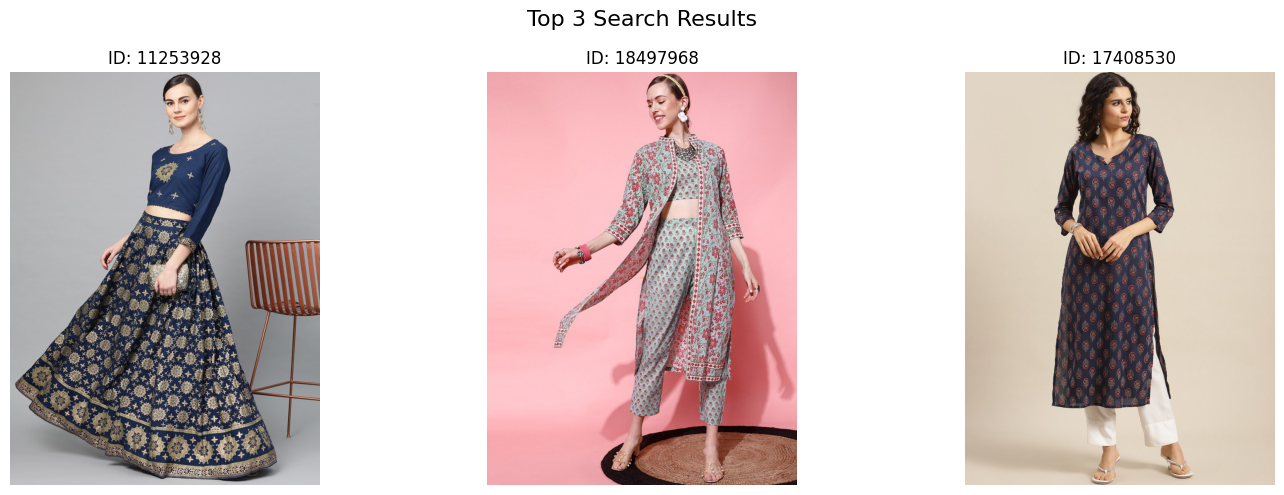

In [37]:
def generate_response_fashion(query, top_3_RAG):
    """
    Generate a response using GPT-3.5 based on the query and top results.
    """

    messages = [
        {"role": "system", "content": "You are a helpful AI assistant in the fashion domain, specialized in providing accurate answers to fashion-related queries."},
        {"role": "user", "content": f"""You have received a query from a user looking for fashion-related information. The query is: "{query}".
             Additionally, you have obtained the top 3 relevant results from the fashion dataset in the dataframe '{top_3_RAG}'.

             The 'Metadatas' column in this dataframe contains JSON strings with product details like item name, brand, and 'Product_img_url'.

             Your task is to use the information provided in '{top_3_RAG}' to generate a response to the query "{query}". Ensure that your response is informative and relevant to the user's query. Utilize the metadata to cite the relevant fashion items.

             Please adhere to the following guidelines:
             1. Provide accurate and relevant information based on the user query and the top 3 search results.
             2. You may use any relevant details from the dataframe to craft your response.
             3. If any of the fashion items contain tables or structured information, format and present it clearly.
             4. Use the metadata to cite the names, brands of the relevant fashion items.
             5. If you are unable to provide a complete answer, offer guidance on where the user can find further information within the cited fashion items.
             6. As a user-facing assistant, focus on delivering a direct and concise response without delving into technical details.
             7. Please note that detailed price and rating information might change from time to time. For more details,you should recommend to visit our website page.

             Your response should directly address the user's query and include citations for the referenced fashion items. Present the information in a well-organized and easily understandable format.
             """},
    ]

    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages
    )

    # Extract Product IDs and Image URLs
    product_ids = []
    product_img_urls = []
    for metadata_json in top_3_RAG['Metadatas'].head(3):
      if isinstance(metadata_json, str):
        if "Product_id" in metadata_json:

          # Find the start and end indices of the value
          start_index = metadata_json.find("'Product_id': '") + len("'Product_id': '")
          end_index = metadata_json.find("'", start_index)

          # Extract the image URL
          product_id = metadata_json[start_index:end_index]
          product_ids.append(product_id)
      else:
        product_ids.append(metadata_json['Product_id'])
      if isinstance(metadata_json, str):
        if "Product_img_url" in metadata_json:
          # Find the start and end indices of the value
          start_index = metadata_json.find("'Product_img_url': '") + len("'Product_img_url': '")
          end_index = metadata_json.find("'", start_index)

          # Extract the image URL
          product_img_url = metadata_json[start_index:end_index]
          product_img_urls.append(product_img_url)
      else:
        product_img_urls.append(metadata_json['Product_img_url'])

    return response.choices[0].message.content, product_ids, product_img_urls


# Generate response, product IDs, and image URLs
response, p_ids, img_urls = generate_response_fashion(query, top_3_RAG)
print(response)

# Display the images
num_images = len(p_ids)
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

# Set the title of the plot as the user query
fig.suptitle(f"Top {num_images} Search Results", fontsize=16)

for i, img_url in enumerate(img_urls):
    try:
        response = requests.get(img_url)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))
        axes[i].imshow(img)
        axes[i].axis('off')
        product_id = img_url.split('/')[-5].split('.')[0]  # Assuming the last part before the extension is the ID
        axes[i].set_title(f"ID: {product_id}")
    except requests.exceptions.RequestException as e:
        axes[i].axis('off')
        axes[i].text(0.5, 0.5, f"Error loading image: {e}", fontsize=12, ha='center', va='center')

plt.tight_layout()
plt.show()


**Conclusion**

When comparing the results from the search layer and the generation layer, it's clear that the latter offers a superior user experience. While the search layer efficiently retrieves relevant items based on keyword matching, the generation layer goes a step further. By employing advanced AI models like GPT-3.5, it dynamically crafts detailed and contextually relevant responses in natural language.

This nuanced understanding of the query enables the generation layer to provide more informative and user-friendly output. It goes beyond simply presenting relevant results; it delivers explanations, summaries, and even creative interpretations tailored to the user's needs. This personalized approach results in responses that are not only accurate but also engaging and easy to understand.

Furthermore, the generation layer's adaptability allows it to accommodate diverse query formats and cater to different user preferences. This versatility makes it a powerful tool for applications where a deep understanding and clear communication of information are paramount.

In essence, while the search layer provides a foundational retrieval mechanism, the generation layer elevates the search experience by offering comprehensive and user-centric responses. Its ability to interpret queries, generate detailed answers, and adapt to user needs makes it an invaluable component of modern search systems.